In [32]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [33]:
# Reading the dataset
water = pd.read_csv('water.csv')

In [34]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [35]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [36]:
# Distribution of features
import matplotlib.pyplot as plt
import seaborn as sns

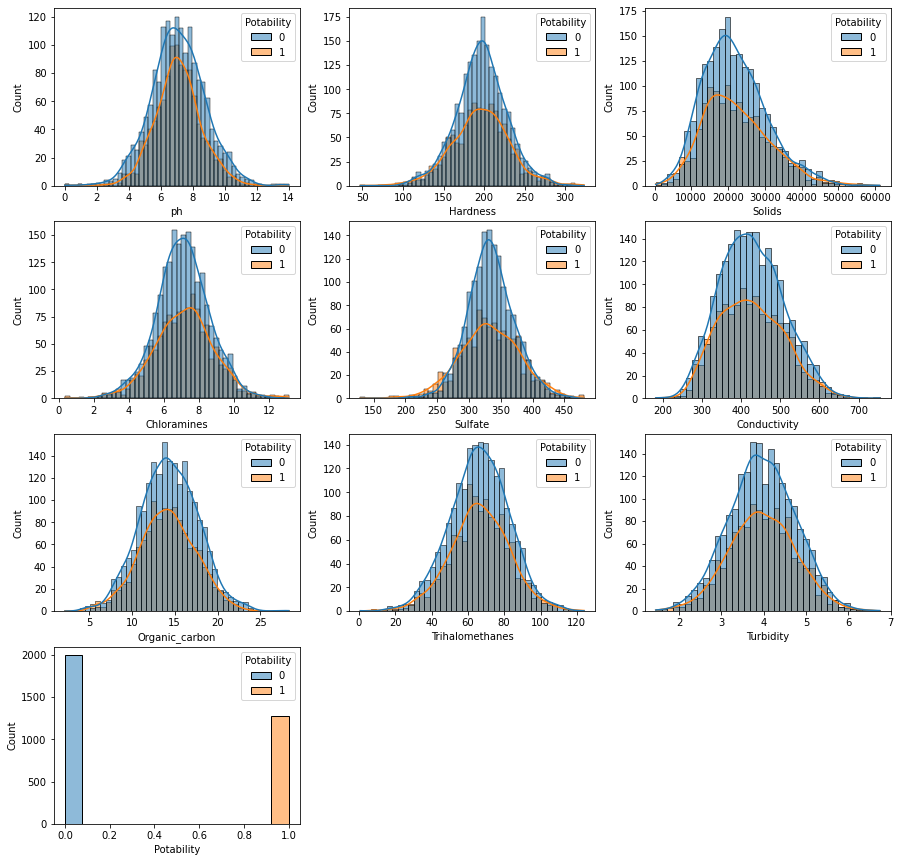

In [37]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(water.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(data=water, x=col, hue='Potability', kde=True)
plt.show()

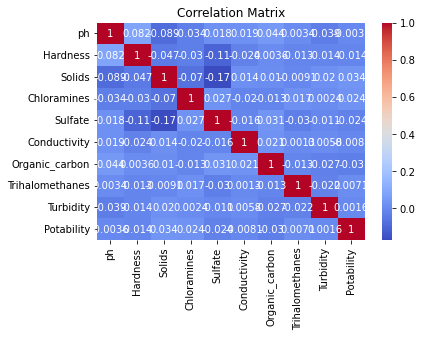

In [38]:
# Correlation matrix
sns.heatmap(water.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

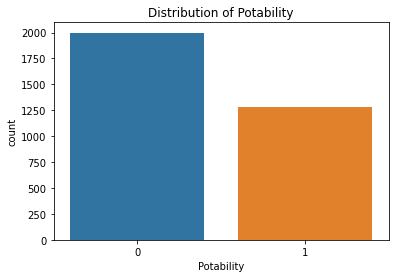

In [39]:
# Distribution of the target variable
sns.countplot(x="Potability", data=water)
plt.title("Distribution of Potability")
plt.show()

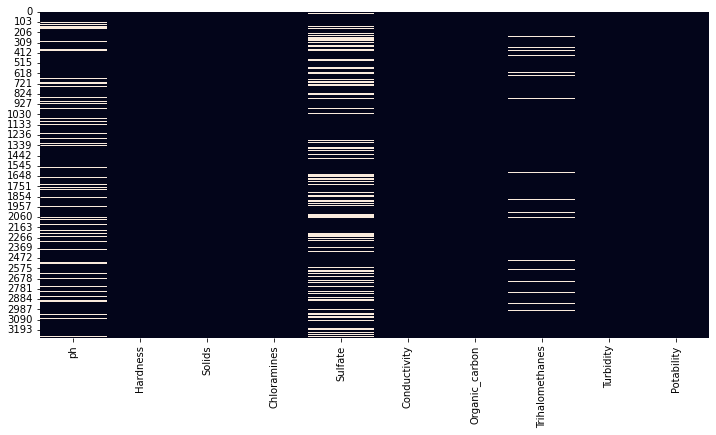

In [40]:
# Checking for missing values
plt.figure(figsize=(12, 6))
sns.heatmap(water.isnull(), cbar=False)
plt.show()

In [41]:
# Removing duplicates
water.drop_duplicates(inplace=True)

In [42]:
# Handling missing values
water.fillna(water.mean(), inplace=True)

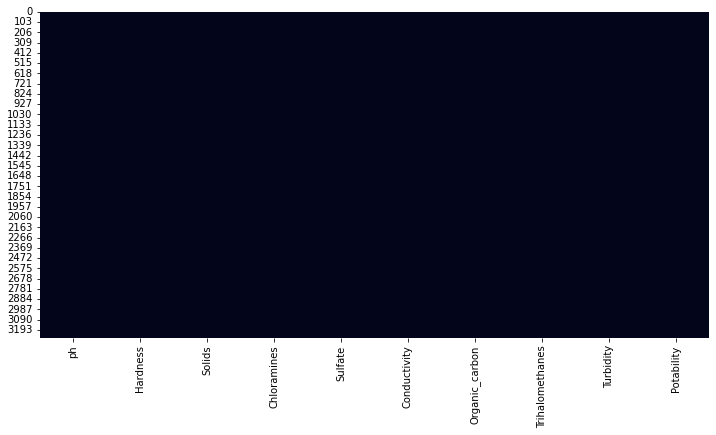

In [43]:
# Showing missing values again
plt.figure(figsize=(12, 6))
sns.heatmap(water.isnull(), cbar=False)
plt.show()

In [44]:
# Scaling the dataset
scaler = MinMaxScaler()
water_scaled = scaler.fit_transform(water.drop('Potability', axis=1))

In [45]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(water_scaled, water['Potability'], test_size=0.2, random_state=42)

CLASSIFICATION ALGORITHMS

Logistic Regression

In [46]:
# Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [47]:
# Calculating metrics for Logistic Regression
lr_acc = accuracy_score(y_test, lr_pred)
lr_cm = confusion_matrix(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, zero_division=0)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

In [48]:
# Printing metrics for Logistic Regression
print("Logistic Regression accuracy:", lr_acc)
print("Logistic Regression confusion matrix:\n", lr_cm)
print("Logistic Regression precision:", lr_precision)
print("Logistic Regression recall:", lr_recall)
print("Logistic Regression F1 score:", lr_f1)

Logistic Regression accuracy: 0.6280487804878049
Logistic Regression confusion matrix:
 [[412   0]
 [244   0]]
Logistic Regression precision: 0.0
Logistic Regression recall: 0.0
Logistic Regression F1 score: 0.0


In [49]:
from imblearn.over_sampling import RandomOverSampler

# Balancing the classes using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(water.drop('Potability', axis=1), water['Potability'])

# Scaling the dataset
scaler = MinMaxScaler()
water_scaled = scaler.fit_transform(X_resampled)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(water_scaled, y_resampled, test_size=0.2, random_state=42)

In [50]:
# Training Logistic Regression model again
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_cm = confusion_matrix(y_test, lr_pred)
lr_prec = precision_score(y_test, lr_pred)
lr_rec = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

In [51]:
print("Logistic Regression accuracy:", lr_acc)
print("Logistic Regression confusion matrix:\n", lr_cm)
print("Logistic Regression precision:", lr_prec)
print("Logistic Regression recall:", lr_rec)
print("Logistic Regression F1 score:", lr_f1)

Logistic Regression accuracy: 0.50875
Logistic Regression confusion matrix:
 [[225 169]
 [224 182]]
Logistic Regression precision: 0.5185185185185185
Logistic Regression recall: 0.4482758620689655
Logistic Regression F1 score: 0.4808454425363276


Random Forest Classifier

In [53]:
# Random Forest Classifier model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [54]:
# Calculating metrics for Random Forest Classifier
rfc_acc = accuracy_score(y_test, rfc_pred)
rfc_cm = confusion_matrix(y_test, rfc_pred)
rfc_precision = precision_score(y_test, rfc_pred)
rfc_recall = recall_score(y_test, rfc_pred)
rfc_f1 = f1_score(y_test, rfc_pred)

In [55]:
print("Random Forest Classifier accuracy:", rfc_acc)
print("Random Forest Classifier confusion matrix:\n", rfc_cm)
print("Random Forest Classifier precision:", rfc_precision)
print("Random Forest Classifier recall:", rfc_recall)
print("Random Forest Classifier F1 score:", rfc_f1)

Random Forest Classifier accuracy: 0.77875
Random Forest Classifier confusion matrix:
 [[317  77]
 [100 306]]
Random Forest Classifier precision: 0.7989556135770235
Random Forest Classifier recall: 0.7536945812807881
Random Forest Classifier F1 score: 0.7756653992395437


SVM

In [56]:
from sklearn.svm import SVC

In [57]:
# SVM model
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)

In [58]:
print("SVM accuracy:", svm_acc)
print("SVM confusion matrix:\n", svm_cm)
print("SVM precision:", svm_precision)
print("SVM recall:", svm_recall)
print("SVM F1 score:", svm_f1)

SVM accuracy: 0.65375
SVM confusion matrix:
 [[291 103]
 [174 232]]
SVM precision: 0.6925373134328359
SVM recall: 0.5714285714285714
SVM F1 score: 0.6261808367071525


CLUSTERING ALGORITHMS

K- Means

In [60]:
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(water_scaled)
    distortions.append(kmeans.inertia_)

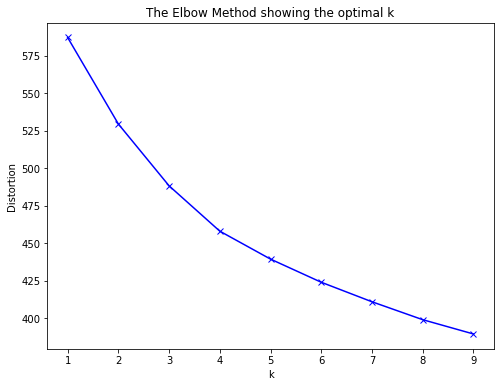

In [61]:
plt.figure(figsize=(8,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [77]:
# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
kmeans_pred = kmeans.predict(X_test)

In [82]:
from sklearn.decomposition import PCA
# Dimensionality reduction using PCA
pca = PCA(n_components=2)
water_pca = pca.fit_transform(water_scaled)

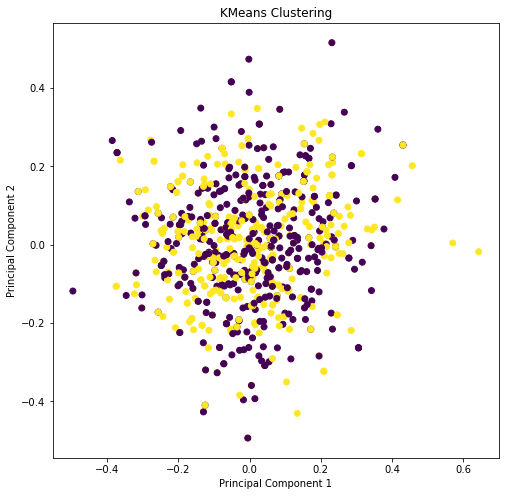

In [85]:
# Visualizing the clusters
plt.figure(figsize=(8, 8))
plt.scatter(water_pca[X_train.shape[0]:, 0], water_pca[X_train.shape[0]:, 1], c=kmeans_pred, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering')
plt.show()

In [78]:
# Calculating metrics for K-means clustering
kmeans_acc = accuracy_score(y_test, kmeans_pred)
kmeans_cm = confusion_matrix(y_test, kmeans_pred)
kmeans_precision = precision_score(y_test, kmeans_pred)
kmeans_recall = recall_score(y_test, kmeans_pred)
kmeans_f1 = f1_score(y_test, kmeans_pred)

In [79]:
# Printing metrics for K-means clustering
print("K-means clustering accuracy:", kmeans_acc)
print("K-means clustering confusion matrix:\n", kmeans_cm)
print("K-means clustering precision:", kmeans_precision)
print("K-means clustering recall:", kmeans_recall)
print("K-means clustering F1:", kmeans_f1)

K-means clustering accuracy: 0.49625
K-means clustering confusion matrix:
 [[203 191]
 [212 194]]
K-means clustering precision: 0.5038961038961038
K-means clustering recall: 0.47783251231527096
K-means clustering F1: 0.49051833122629585


Hierarchical clustering

In [87]:
# Hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clustering.fit(X_train)
agg_pred = agg_clustering.fit_predict(X_test)

In [88]:
# Evaluation metrics
agg_accuracy = accuracy_score(y_test, agg_pred)
agg_confusion_matrix = confusion_matrix(y_test, agg_pred)
agg_precision = precision_score(y_test, agg_pred)
agg_recall = recall_score(y_test, agg_pred)
agg_f1_score = f1_score(y_test, agg_pred)

In [89]:
# Print evaluation metrics
print("Hierarchical clustering accuracy:", agg_accuracy)
print("Hierarchical clustering confusion matrix:\n", agg_confusion_matrix)
print("Hierarchical clustering precision:", agg_precision)
print("Hierarchical clustering recall:", agg_recall)
print("Hierarchical clustering F1 score:", agg_f1_score)

Hierarchical clustering accuracy: 0.5075
Hierarchical clustering confusion matrix:
 [[294 100]
 [294 112]]
Hierarchical clustering precision: 0.5283018867924528
Hierarchical clustering recall: 0.27586206896551724
Hierarchical clustering F1 score: 0.36245954692556637


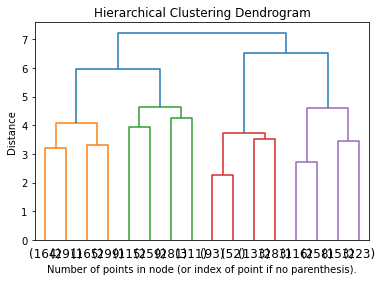

In [91]:
linkage_matrix = linkage(X_train, method='ward')
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance")
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

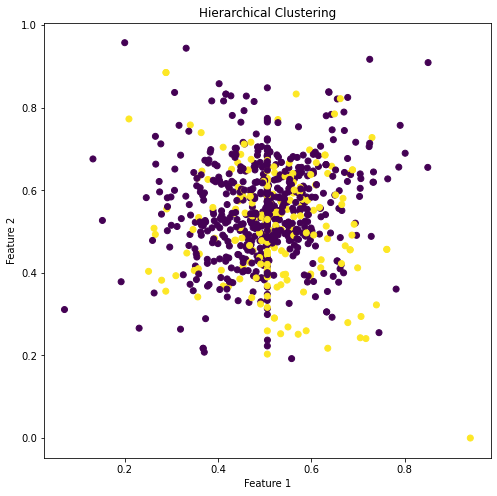

In [92]:
# Visualizing the clusters
plt.figure(figsize=(8, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=agg_pred, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical Clustering')
plt.show()